# Available Methods

In [ ]:
import numpy as np
import pandas as pd
import ysoisochrone

df_prop = pd.read_csv('example_targets.csv')

## The Bayesian Inference Approach

Estimating stellar ages and masses in the Bayesian inference approach is the primary method that is focused in `ysoisochrone`. This method was first introduced in [Pascucci et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...831..125P/abstract). The stellar masses, ages, and associated uncertainties are estimated from the stellar effective temperature ($T_{\rm eff}$), bolometric luminosity ($L_{\rm bol}$), and their uncertainties. Uniform priors are assumed, and the likelihood functions are defined following [Andrews et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013ApJ...771..129A/abstract). 

The pre-main-sequence evolutionary models from both [Feiden (2016)](https://ui.adsabs.harvard.edu/abs/2016A%26A...593A..99F/abstract) and [Baraffe et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015A%26A...577A..42B/abstract) are adopted for hot ($T_{\rm eff} > 3,900$) and cool stars ($T_{\rm eff} \leq 3,900$), respectively. The same combination of the pre-main-sequence evolutionary models was also adopted in [Manara et al. (2022)](https://arxiv.org/abs/2203.09930) as one of the review chapter in [Protostars and Planets VII](http://ppvii.org/chapter-list/index.html). 

We provide a simple way to use this as

/Users/dingshandeng/opt/anaconda3/lib/python3.9/site-packages/ysoisochrone/plotting.py:114: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(im)


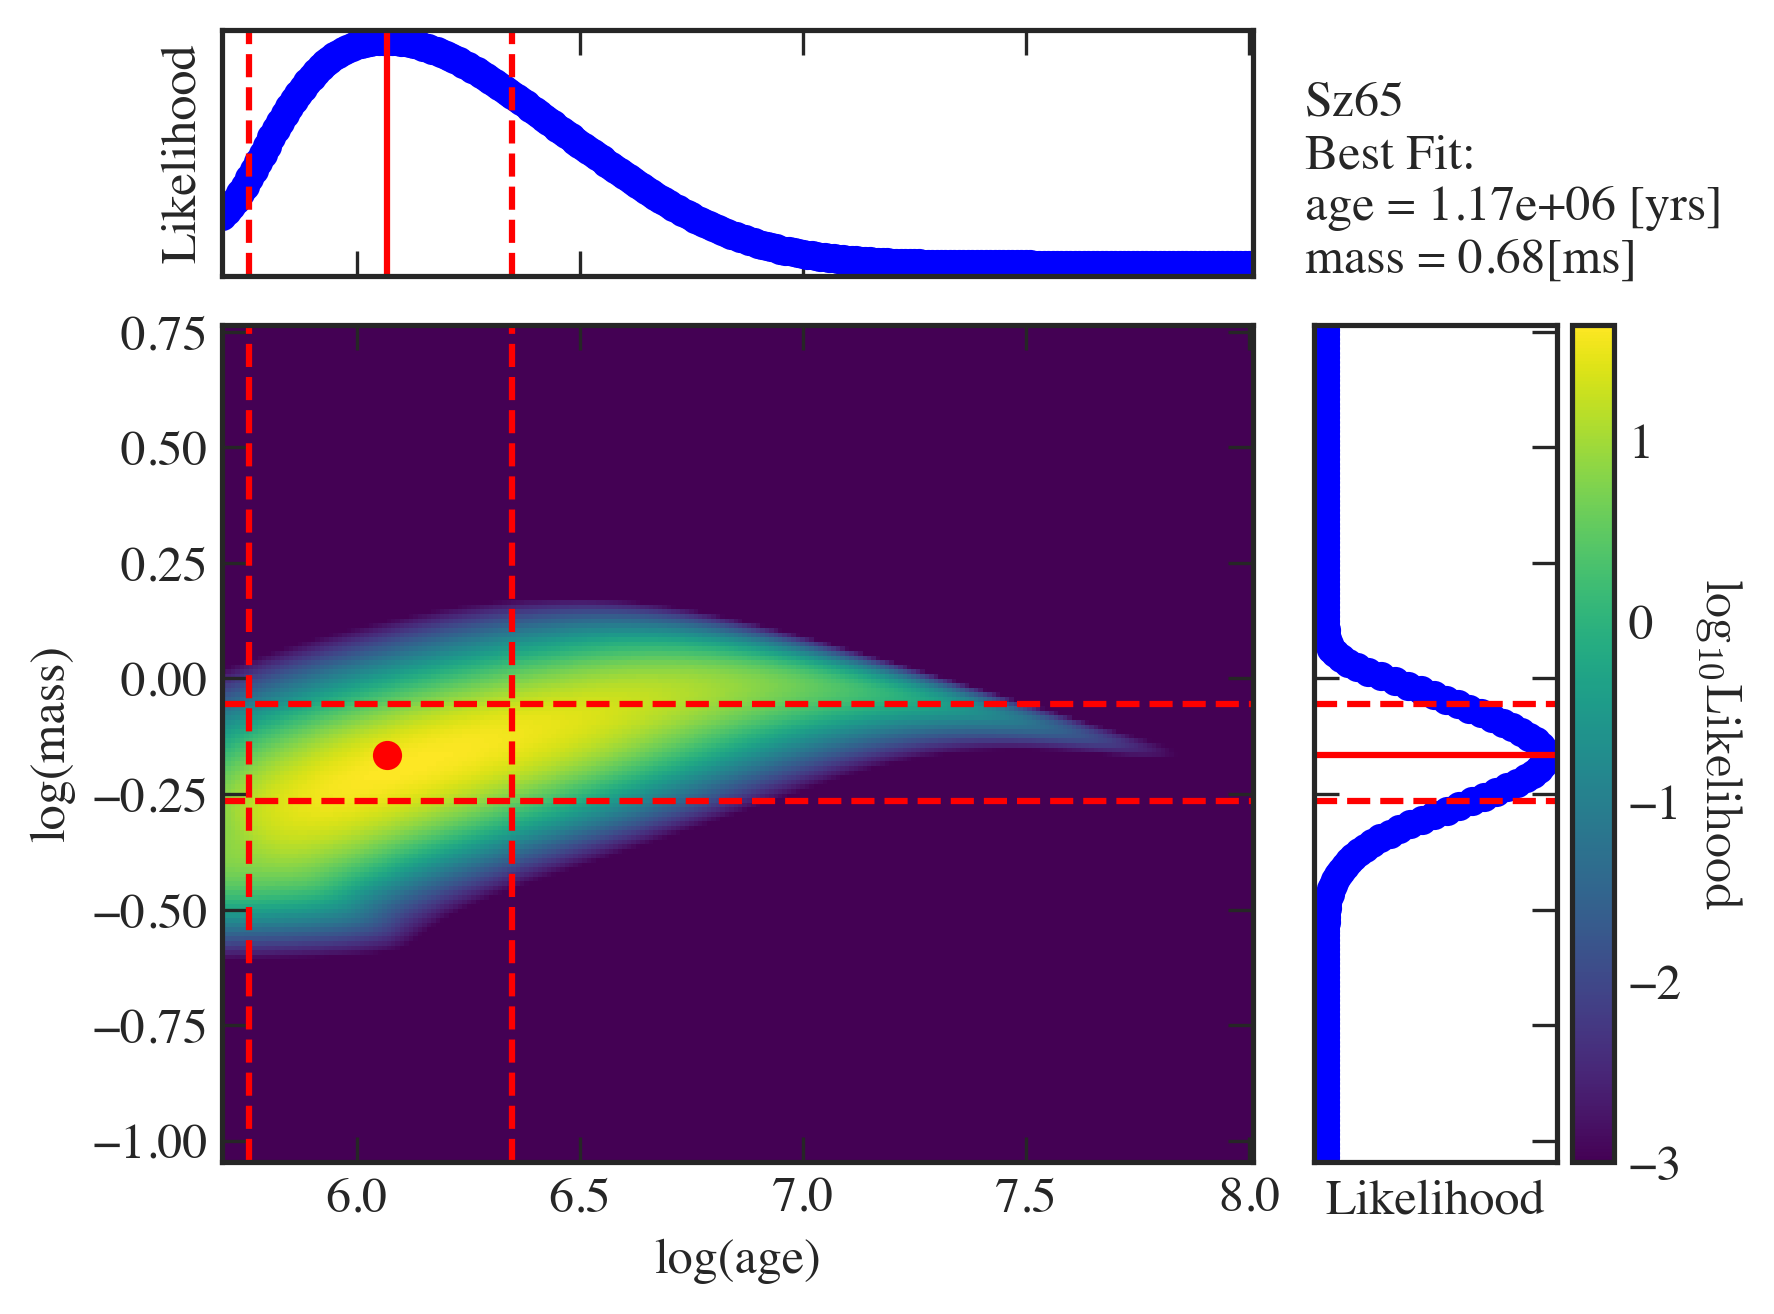

In [ ]:
df_prop_t = df_prop.loc[:0]

best_logmass_output_t, best_logage_output_t, _, _ =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop_t, model='Baraffe_n_Feiden', plot=True)

where you just simply set the `model='Baraffe_n_Feiden'` in the function. Here we also turn on the `plot = True` to show the intermediate diagnoostic plot.

In this approach, also follow the choice made in [Pascucci et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...831..125P/abstract), we put some pre-assumed uncertainties for $T_{\rm eff}$ and $L$: 

- ${\rm err}(\log_{10}{T_{\rm eff}}) = 0.02$ for $T_{\rm eff} > 3420.0\,{\rm K}$ and ${\rm err}(\log_{10}{T_{\rm eff}}) = 0.01$ for cooler targets.
- ${\rm err}(\log_{10}L = 0.1)$ for all targets

You can assign these default uncertainties to your DataFrame by calling

```python
err_Teff = ysoisochrone.utils.assign_unc_teff(df_prop['Teff'].values)
err_Lumi = ysoisochrone.utils.assign_unc_lumi(df_prop['Luminosity'].values)
df_prop['e_Teff'] = err_Teff
df_prop['e_Luminosity'] = err_Lumi
```

Or you can do this in a simple way by turning on the option of `no_uncertainties = True` in `ysoisochrone.bayesian.derive_stellar_mass_age`. In this way, the code will automatically assign the uncertainties as described above to you sample even if the `'e_Teff'` and `'e_Luminosity'` is set up in your dataset.

```python
df_prop_t = pd.DataFrame({
    'Source': ['Sz65'],
    'Teff': np.array([4060.0]),
    'Luminosity': np.array([0.869])
})

best_logmass_output_t, best_logage_output_t, _, _ =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop_t, model='Baraffe_n_Feiden', plot=True, no_uncertainties=True)
```

**NOTE** *we strongly encourage the users to set up your own uncertainties* in the input `df_prop` for your targets even you do not have the meausred values. You can do this by changing the numbers in the input `.csv` file or utilize the feature for `pandas.DataFrame`
 
```python
df_prop.loc[:, 'e_Teff'] = # An array of the e_Teff you set up
df_prop.loc[:, 'e_Luminosity'] = # An array of the e_Luminosity you set up
```

**TIPS** Please refer to [Data Frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) for how to handle the `pandas.DataFrame`. It is a powerful tool that you can not only import data from `.csv` files but many other format such as `.xlsx`, `.json`, and `.html`. For theo output files, it can also be utilized to generate `latex` format files `.tex` so it can be easily import to your on going `latex` manuscript.

## Assuming age to derive stellar masses

In some cases, when a good measurement of stellar luminosity is unavailable,  we also provide an option to set up the assumed age (`assumed_age=1.5e6` in the example, it is in the unit of yr) to derive the stellar mass from the Bayesian inference. 

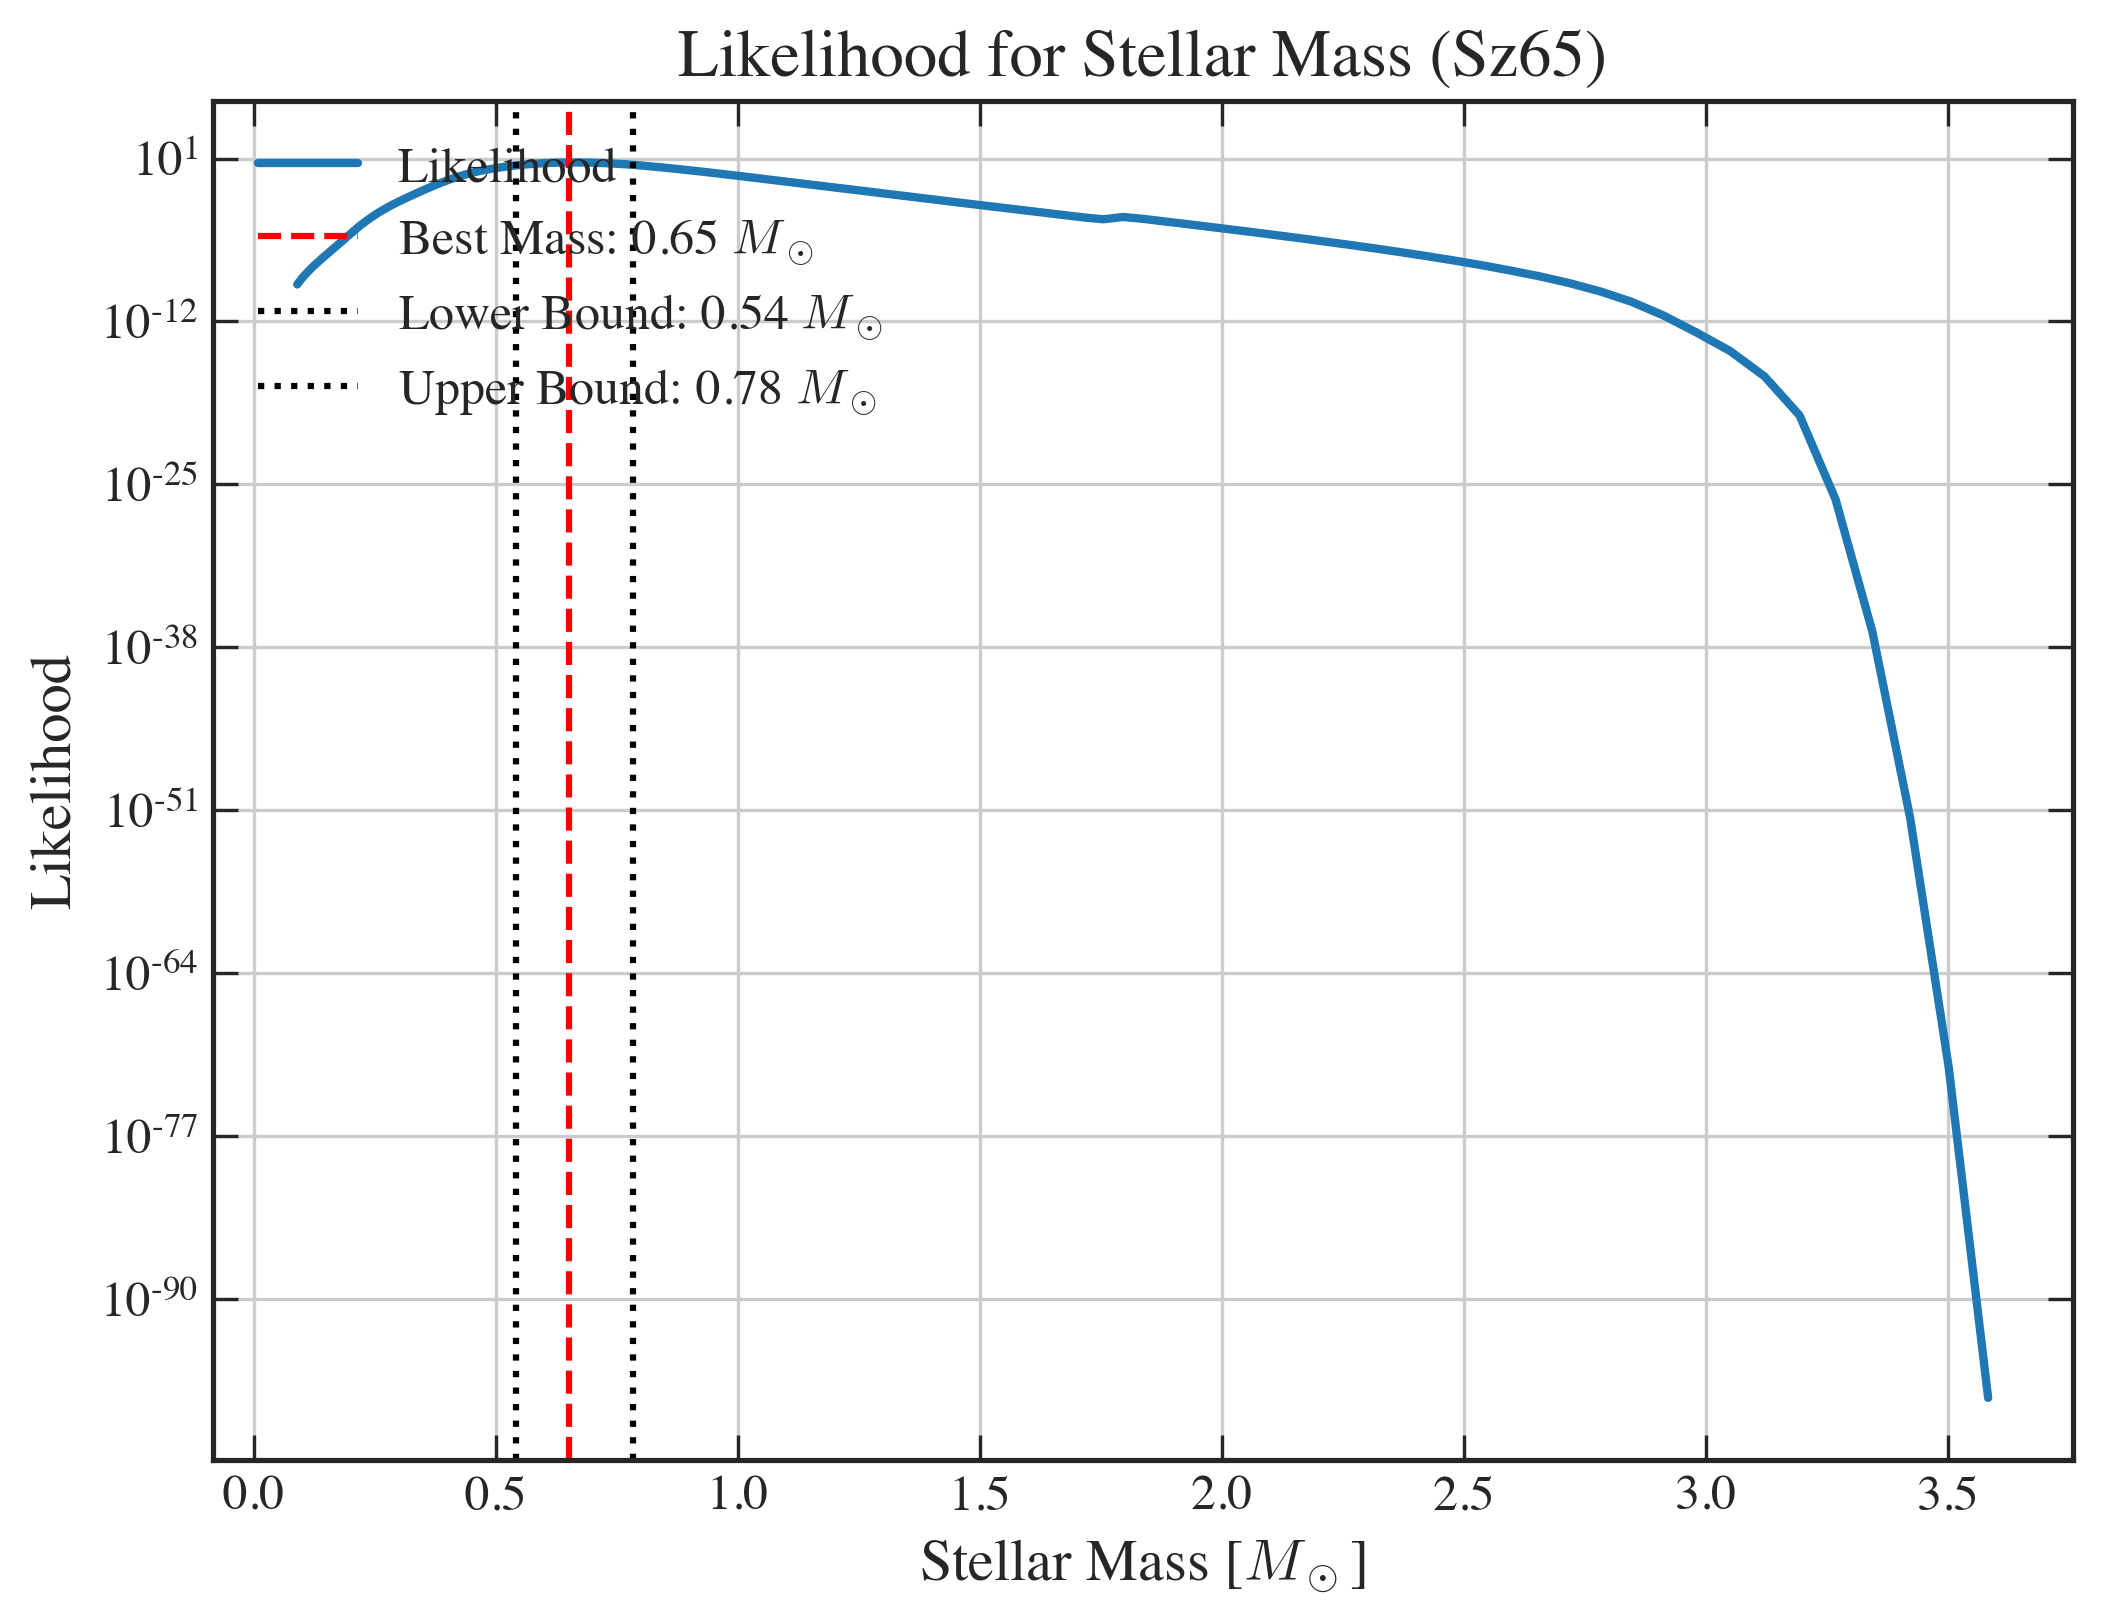

([-0.18575749056067445], [[0.08000000000000004, 0.08000000000000003]])

In [ ]:
df_prop_t = df_prop.loc[:0]

best_logmass_output_t = ysoisochrone.bayesian.derive_stellar_mass_assuming_age(df_prop_t, assumed_age=1.5e6, model='Baraffe_n_Feiden', plot=True)

## Closest grid point on isochrone

Of course we provide this option for you to simply estimate the stellar masses and ages from the grid point that has the closest $T_{\rm eff}$ and $L_{\rm bol}$ to the target without using any Bayesian inference. This was the approach adopted in many literature works.

In [ ]:
df_prop_t = df_prop.loc[:0]

best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop_t, model='Baraffe_n_Feiden', verbose=True)

Working on: Sz65
Closest match for Sz65: Age = 1.32e+06 yrs, Mass = 6.52e-01 Msun


**NOTE** In this method, we do not estimate the uncertainties. The output best-fit logmass and logage are the closest track and no uncertainties are provided.